In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

from numpy import median, mean
import statistics
%matplotlib inline

<h1> Getting BMI data<h1>

In [3]:
path = '/Users/ishan/desktop/niroggyan/get_active_data_analysis/data/'
data = pd.read_csv(path + 'final.csv')

In [4]:
new = pd.pivot_table(data, values='VALUE', index=['NAME', 'AGE', 'GENDER'],
                    columns=['PARAM TEST'], aggfunc=np.sum, fill_value=0)
bmi = new[['BODY MASS INDEX','HEIGHT','WEIGHT']]
bmi.columns = ['BMI','Height', 'Weight']
bmi.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2534 entries, ('A Anisha', 28, 'female') to ('zmohammed', 30, 'female')
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   BMI     2534 non-null   object
 1   Height  2534 non-null   object
 2   Weight  2534 non-null   object
dtypes: object(3)
memory usage: 89.5+ KB


In [5]:
#Adding gender
l = []
for i in bmi.index:
    l.append(i[2])


bmi['Gender'] = l
bmi.head()

,,,BMI,Height,Weight,Gender
NAME,AGE,GENDER,,,,
A Anisha,28,female,31.47,155,75.6,female
A Bhanu,31,male,25.58,168,72.2,male
A ROMIO SINGH,30,male,25.48,163,67.7,male
ABHISHEK KASHYAP,36,male,29,171,84.8,male
AJAY BENJWAL,28,male,24.25,171,70.9,male


In [6]:
#Adding age
a = []
for i in bmi.index:
    a.append(int(i[1]))
bmi['Age'] = a
bmi.head()

,,,BMI,Height,Weight,Gender,Age
NAME,AGE,GENDER,,,,,
A Anisha,28,female,31.47,155,75.6,female,28
A Bhanu,31,male,25.58,168,72.2,male,31
A ROMIO SINGH,30,male,25.48,163,67.7,male,30
ABHISHEK KASHYAP,36,male,29,171,84.8,male,36
AJAY BENJWAL,28,male,24.25,171,70.9,male,28


In [7]:
bmi = bmi[['Age', 'Gender', 'BMI', 'Height', 'Weight']]
bmi.head()


,,,Age,Gender,BMI,Height,Weight
NAME,AGE,GENDER,,,,,
A Anisha,28,female,28,female,31.47,155,75.6
A Bhanu,31,male,31,male,25.58,168,72.2
A ROMIO SINGH,30,male,30,male,25.48,163,67.7
ABHISHEK KASHYAP,36,male,36,male,29,171,84.8
AJAY BENJWAL,28,male,28,male,24.25,171,70.9


<h1>Changing Datatypes<h1>

In [8]:
def convert(s):
    s = str(s)
    try:
        i = s.index('.')
        return float(s[:(i+2)])
    except:
        return float(s)
    

In [9]:

#bmi['bmi'] = bmi['bmi'].map(lambda bmi : str(bmi))
bmi['BMI'] = bmi['BMI'].map(lambda s: convert(s))
bmi['Weight'] = bmi['Weight'].map(lambda s: convert(s))
bmi['Height'] = bmi['Height'].map(lambda s: convert(s))


In [10]:
'''
for i in range(len(bmi)):
    try:
        bmi.iloc[i]['BMI'] = float(bmi.iloc[i].Height)
    except:
        print(bmi.iloc[i])
'''

"\nfor i in range(len(bmi)):\n    try:\n        bmi.iloc[i]['BMI'] = float(bmi.iloc[i].Height)\n    except:\n        print(bmi.iloc[i])\n"

<h1>Analysis</h1>

In [11]:
bmi.shape

(2534, 5)

In [12]:
bmi.isnull().any()

Age       False
Gender    False
BMI       False
Height    False
Weight    False
dtype: bool

In [12]:
#Giving status according to BMI
'''
(low,high)->type
(0,19)->Underweight
(19, 25)->Normal
(25, 30)->Overweight
(30, 40)->Obese
>40 -> Extreme Obesity
'''
def convert_status_to_description(x):
    if x['BMI'] < 18.5 :
        return 'Underweight'
    elif x['BMI'] < 24.9 :
        return 'Normal'
    elif x['BMI'] < 29.9:
        return 'Overweight'
    elif x['BMI'] < 40:
        return 'Obese'
    else:
        return 'Extreme Obesity'
    
bmi['Status'] = bmi.apply(convert_status_to_description,axis=1)
bmi.head()


,,,Age,Gender,BMI,Height,Weight,Status
NAME,AGE,GENDER,,,,,,
A Anisha,28,female,28,female,31.4,155.0,75.6,Obese
A Bhanu,31,male,31,male,25.5,168.0,72.2,Overweight
A ROMIO SINGH,30,male,30,male,25.4,163.0,67.7,Overweight
ABHISHEK KASHYAP,36,male,36,male,29.0,171.0,84.8,Overweight
AJAY BENJWAL,28,male,28,male,24.2,171.0,70.9,Normal


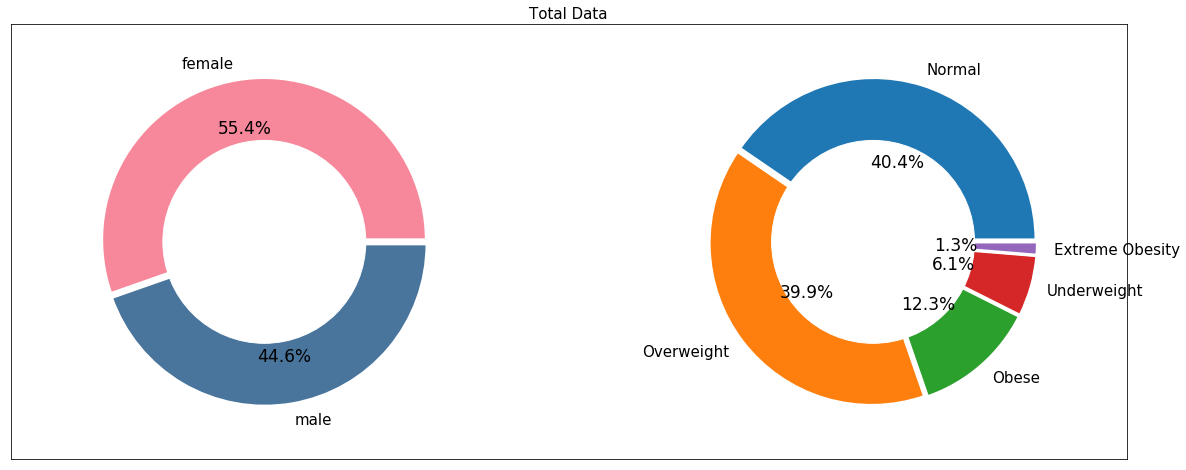

In [13]:
people = bmi['Gender'].value_counts() 
categories = bmi['Status'].value_counts() 

fig = plt.figure(figsize=(20,8))
plt.title("Total Data",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks

# first pie-plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,)*(len(people))

wedges, texts, autotexts =  ax1.pie(people,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['female','male'],
                                    colors=['#f7879a','#49759c'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.7,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes

# Second pie-plot

ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,)*(len(categories))
wedges2, texts2, autotexts2 =  ax2.pie(categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Normal','Overweight','Obese', 'Underweight', 'Extreme Obesity'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.5,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts2,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes



In [14]:
#Removing outliers

#weight
print(len(bmi))
bmi = bmi[(bmi.Weight<140) &(bmi.Weight>10)]
print(len(bmi))

#height
print(len(bmi))
bmi = bmi[(bmi.Height<200) & (bmi.Height>2)]
print(len(bmi))

2534
2391
2391
2146


In [15]:
bmifemales = bmi[bmi.Gender=='female']
bmimales = bmi[bmi.Gender=='male']


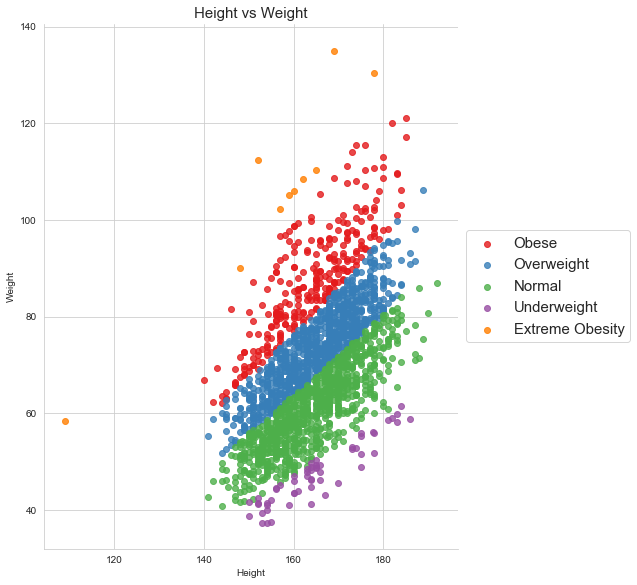

In [16]:
sns.set_style('whitegrid')

# colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']
## http://colorbrewer2.org/#type=qualitative&scheme=Set2&n=6

# plt.scatter(x='Height',y='Weight',data=data_visual,c=data_visual['Index'],
#             cmap=matplotlib.colors.ListedColormap(colors))
# plt.colorbar()

## https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category

sns.lmplot( x='Height', y='Weight', data=bmi, 
           fit_reg=False, 
           hue='Status',
           legend=False, 
           palette='Set1',
           size = 8, 
           aspect = 1
                     )
ax1 = plt.gca()
ax1.set_title('Height vs Weight', size=15)

## https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})

#TODO: check outliers!!! ->Lipid profiles!

<h3>Only Males</h3>

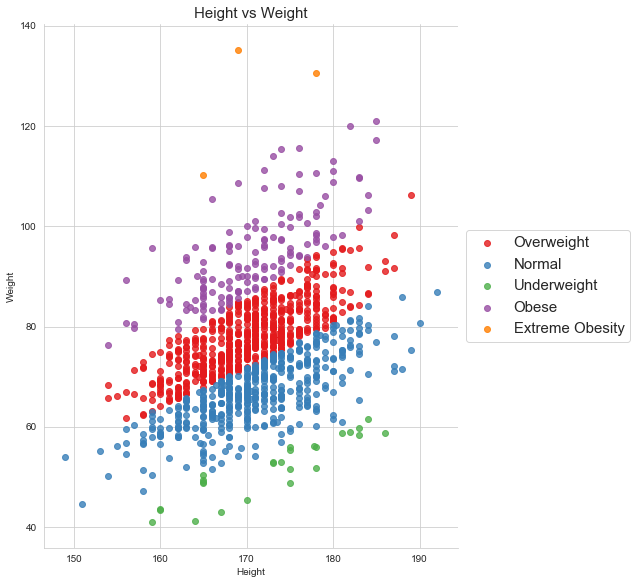

In [17]:
#only males
sns.set_style('whitegrid')

# colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']
## http://colorbrewer2.org/#type=qualitative&scheme=Set2&n=6

# plt.scatter(x='Height',y='Weight',data=data_visual,c=data_visual['Index'],
#             cmap=matplotlib.colors.ListedColormap(colors))
# plt.colorbar()

## https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category

sns.lmplot( x='Height', y='Weight', data=bmimales, 
           fit_reg=False, 
           hue='Status',
           legend=False, 
           palette='Set1',
           size = 8, 
           aspect = 1
                     )
ax1 = plt.gca()
ax1.set_title('Height vs Weight', size=15)

## https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})

<h3>Only Females</h3>

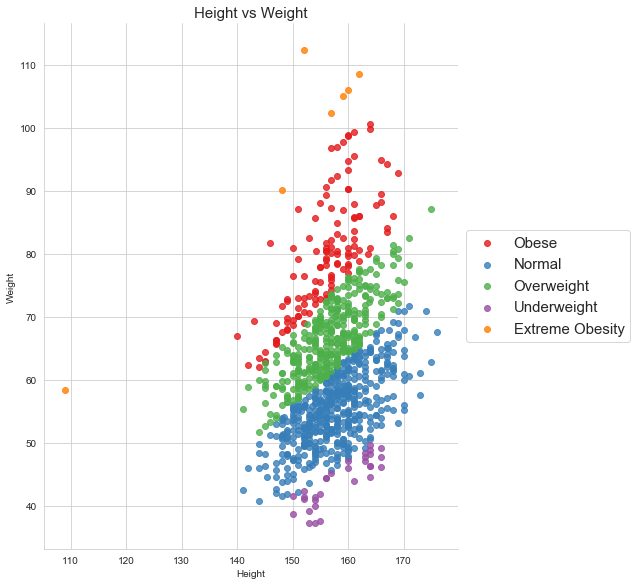

In [18]:
sns.set_style('whitegrid')

# colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']
## http://colorbrewer2.org/#type=qualitative&scheme=Set2&n=6

# plt.scatter(x='Height',y='Weight',data=data_visual,c=data_visual['Index'],
#             cmap=matplotlib.colors.ListedColormap(colors))
# plt.colorbar()

## https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category

sns.lmplot( x='Height', y='Weight', data=bmifemales, 
           fit_reg=False, 
           hue='Status',
           legend=False, 
           palette='Set1',
           size = 8, 
           aspect = 1
                     )
ax1 = plt.gca()
ax1.set_title('Height vs Weight', size=15)

## https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})

In [19]:
bmi['Status'].value_counts()

Normal             906
Overweight         901
Obese              272
Underweight         57
Extreme Obesity     10
Name: Status, dtype: int64

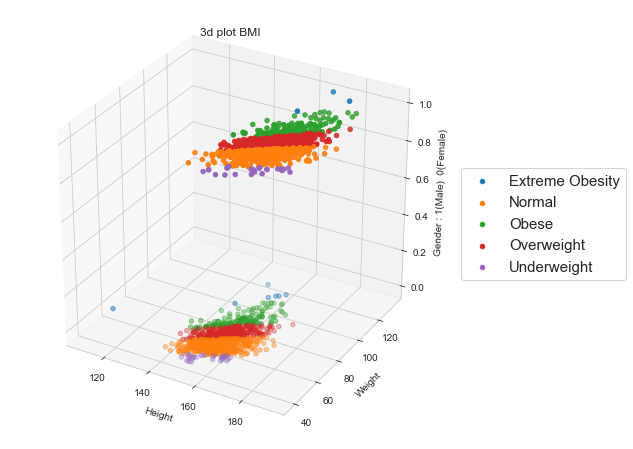

In [20]:
def convert_gender_to_label(x):
    if x['Gender'] == 'male':
        return 1
    elif x['Gender'] == 'female':
        return 0
bmi['gender_lbl'] = bmi.apply(convert_gender_to_label,axis=1)



groups = bmi.groupby('Status')

from mpl_toolkits.mplot3d import Axes3D
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33']
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# ax.scatter(data_visual['Height'],data_visual['Weight'] , data_visual['gender_lbl'], 
#            c=data_visual['Index'],
#            cmap=matplotlib.colors.ListedColormap(colors))


for name, group in groups:
    ax.scatter(group.Height, group.Weight, group.gender_lbl, label=name)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Gender : 1(Male)  0(Female)')
ax.set_title('3d plot BMI')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 15})
plt.show()

In [21]:
#only height and weight distrubutions ??
#identify outliers DONE
#mean, mode DONE
#by gender -> mean(height, wieght) DONE
#avg height of males, females DONE
#only BMI(sorted)->hist
#check other bioparams
#correlation b/w bmi and bp

<h3>Height Distribution</h3>

In [22]:
dwarf = bmi[bmi.Height<=152]
short = bmi[(bmi.Height>152)&(bmi.Height<168)]
average = bmi[(bmi.Height>=168)&(bmi.Height<180)]
tall = bmi[(bmi.Height>=180)&(bmi.Height<190)]
giant = bmi[(bmi.Height>=190)]

In [23]:
print('Median: ', bmi.Height.median())
print('Mean: ', bmi.Height.mean())
print('Medain low: ', statistics.median_low(bmi.Height))
print('Median high: ', statistics.median_high(bmi.Height))
print('Median Grouped: ', statistics.median_grouped(bmi.Height))
print('Mode: ', statistics.mode(bmi.Height))

print('\n')
males = bmi[bmi.Gender=='male']
print('Males Median: ', males.Height.median())
print('Males Mean:(avg height) ',males.Height.mean())

print('\n')
females = bmi[bmi.Gender=='female']
print('Females Median: ', females.Height.median())
print('Females Mean:(avg height) ',females.Height.mean())



Median:  165.0
Mean:  164.61752096924508
Medain low:  165.0
Median high:  165.0
Median Grouped:  164.94444444444446
Mode:  168.0


Males Median:  171.0
Males Mean:(avg height)  170.64093567251464


Males Median:  157.0
Males Mean:(avg height)  157.0200210748156


<h3>Weight Distribution<h3>

In [24]:
#weight groups?
#heavy, average, light(general), different for males and females!


In [25]:
print('Median: ', bmi.Weight.median())
print('Mean: ', bmi.Weight.mean())
print('Medain low: ', statistics.median_low(bmi.Weight))
print('Median high: ', statistics.median_high(bmi.Weight))
print('Median Grouped: ', statistics.median_grouped(bmi.Weight))
print('Mode: ', statistics.mode(bmi.Weight))

print('\n')
males = bmi[bmi.Gender=='male']
print('Males Median: ', males.Weight.median())
print('Males Mean: (avg weight) ',males.Weight.mean())

print('\n')
females = bmi[bmi.Gender=='female']
print('Males Median: ', females.Weight.median())
print('Males Mean: (avg weight) ',females.Weight.mean())

Median:  69.1
Mean:  69.70964585274932
Medain low:  69.1
Median high:  69.1
Median Grouped:  68.93333333333332
Mode:  66.6


Males Median:  74.7
Males Mean: (avg weight)  75.53316624895572


Males Median:  61.2
Males Mean: (avg weight)  62.364278187565866


<h3>Height v/s weight</h3>

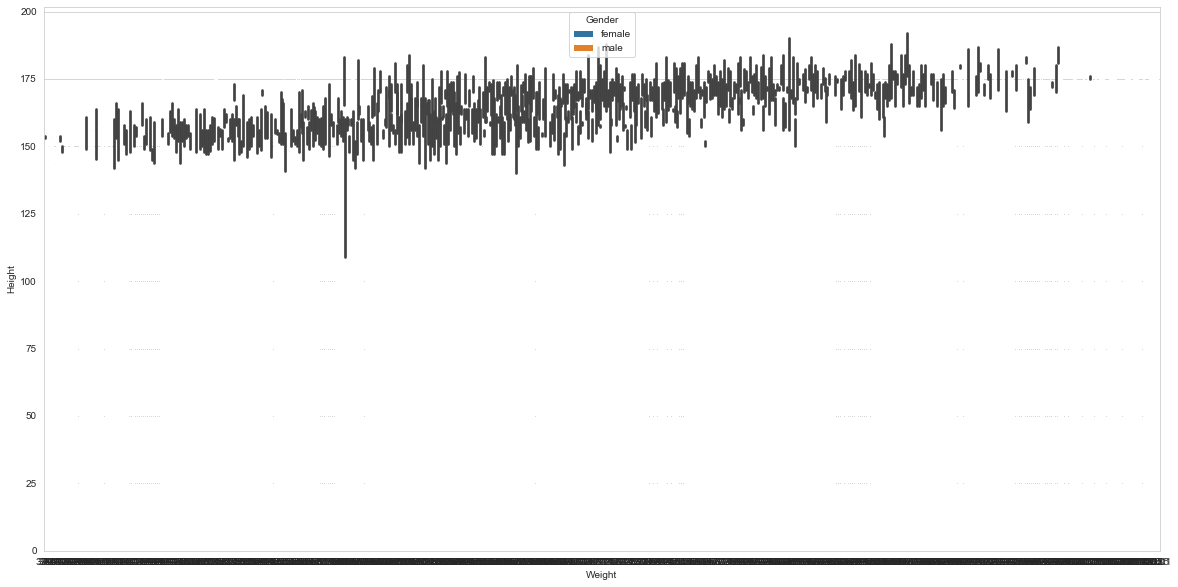

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(x="Weight", y="Height", data=bmi,hue = 'Gender',estimator=median);

<Figure size 1440x720 with 0 Axes>

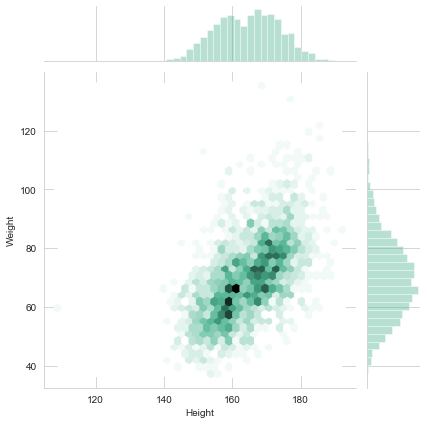

In [27]:
plt.figure(figsize=(20,10))
sns.jointplot(bmi.Height, bmi.Weight, kind="hex", color="#4CB391")

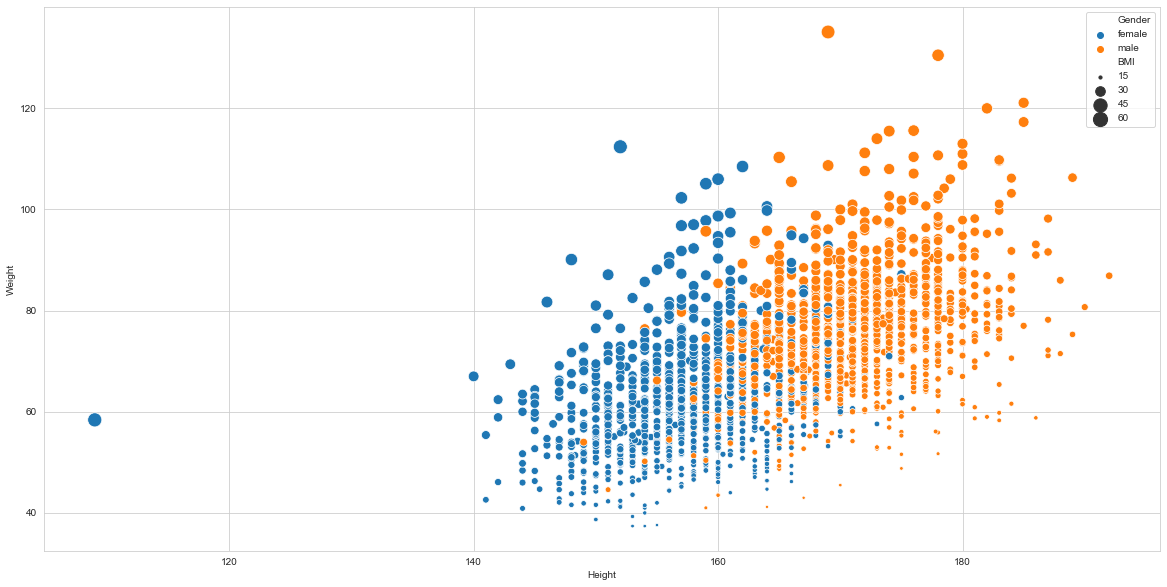

In [28]:
plt.figure(figsize=(20,10))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="Height", y="Weight",
                     hue="Gender", size="BMI",
                    sizes=(10, 200),
                     data=bmi)

<h3>Only Males</h3>

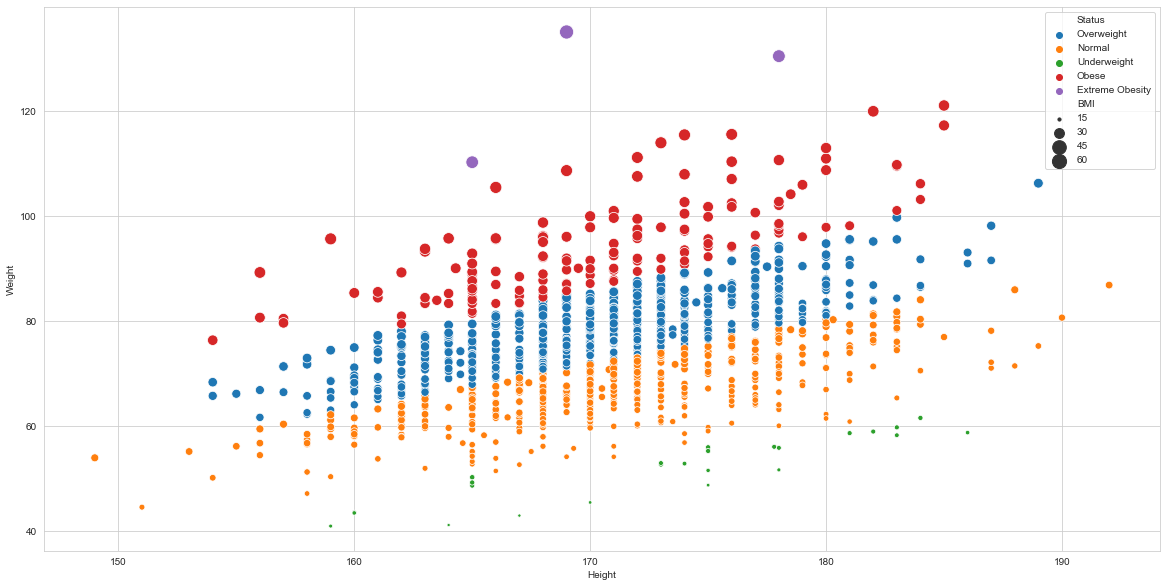

In [29]:
plt.figure(figsize=(20,10))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="Height", y="Weight",
                     hue="Status", size="BMI",
                    sizes=(10, 200),
                     data=bmimales)

<h3>Only Females</h3>

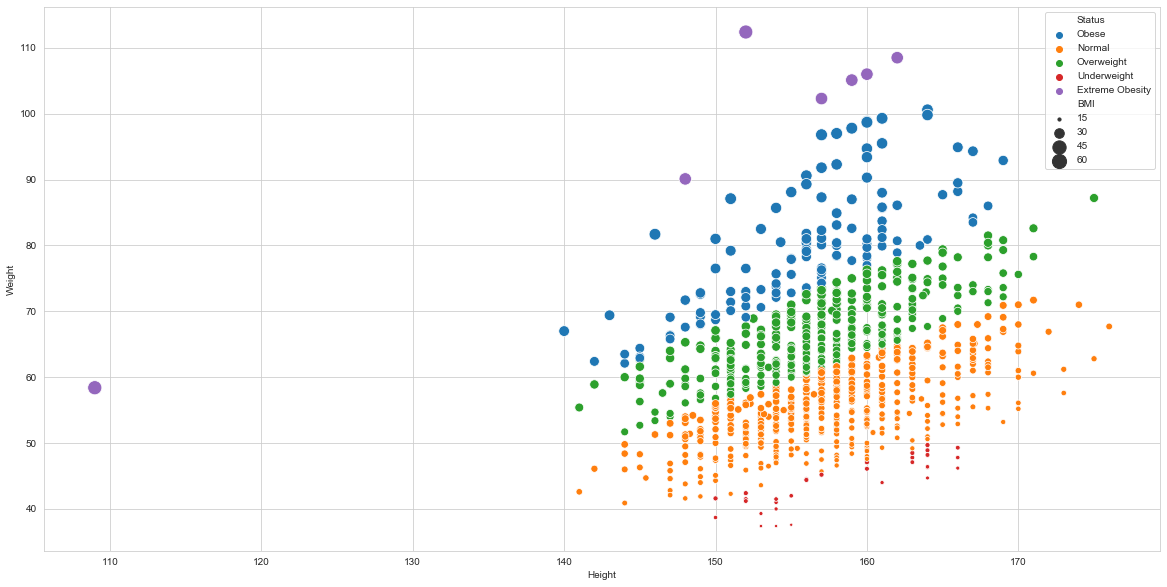

In [30]:
plt.figure(figsize=(20,10))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="Height", y="Weight",
                     hue="Status", size="BMI",
                    sizes=(10, 200),
                     data=bmifemales)

In [31]:
#TODO:research on indian population bmi!